# San Antonio City Compensation Data Analysis

# Imports, Formating, and read CSV

In [1]:
#change lite to True if on public computer coding
#change record to True to save png files of graphs and plots :)

lite = False
record = False

if lite == True: # if we are using Jupyter Notebook Lite
    import datetime
    import locale
    import numpy as np
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    import pandas as pd
    import piplite
    await piplite.install("jinja2")
    import jinja2
    await piplite.install('seaborn')
    import seaborn as sns
    
else: #Running Regular Jupyter
    import datetime
    import locale
    import numpy as np
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    import pandas as pd
    import dataframe_image as dfi
    import seaborn as sns

In [2]:
#format integers to not print in scientific notaion (for later)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

#format integers to not print in scientific notaion (for later)
plt.ticklabel_format(style='plain')

sns.set_theme(rc={'axes.formatter.limits': (-8, 9)})
%matplotlib inline

In [3]:
#read the csv and create database
comp = pd.read_csv('FY21CityComp_master.csv')

# Clean the Data

In [4]:
## Misspelling

In [5]:
# additional benefits, business area should have underscores --> additional_benefits, business_area
# annual_salaray --> salary

comp['annual_salary'] = comp['annual_salaray']
comp.drop('annual_salaray',axis=1,inplace=True)

comp['additional_benefits'] = comp['additional benefits']
comp.drop('additional benefits',axis=1,inplace=True)

comp['business_area'] = comp['business area']
comp.drop('business area',axis=1,inplace=True)

In [6]:
#Change my co-worker who goes EMERSON
#the line below is how I found out Emerson's index number
#comp[(comp['first_name']=='MEGAN') & (comp['last_name'] == 'STANLEY')]

comp.loc[6967,'first_name'] = 'EMERSON'
comp.loc[8098,'first_name'] = 'J.D.'
comp.loc[7456,'first_name'] = 'ANGELINA'

In [7]:
## Datatypes

In [8]:
### Changing strings to integers and fixing some spellings

In [9]:
#these need to be turned into floats
convert_to_floats= ['annual_salary','base_pay','leave_payout','other_pay','overtime','gross_earnings','additional_benefits','total_compensation']

for x in convert_to_floats:
    comp[x] = comp[x].str.replace(',','')
    comp[x] = comp[x].astype(float,copy=None,errors='ignore')

In [10]:
### Drop columns that are empty

In [11]:
#Every vaule in the a_&_s column is 0
#there must not have been any lawsuits etc.?
#so let's drop it.
comp.drop('arbitration_&_settlements',axis=1,inplace=True)

In [12]:
### Change strings to date time

In [13]:
comp['hire_date'] = pd.to_datetime(comp['hire_date'], errors='ignore')
comp['withdraw_date'] = pd.to_datetime(comp['withdraw_date'], errors='ignore')

In [14]:
### Make a Business area label column for graphing purposes

In [15]:
keys = list(comp['business_area'].unique())

values = ['MAN','ATT','POL','FIR','FIN','ITS','AVI', 'BES','PW','PREK','AUD',
  'DS','LIB','HR','C&SF','HS','PLA','SWM','N&HS','M&B','PAR','HEA','RISK','ART','HP',
  'ED','CCD&O','G&PA','CLERK','WH','ACS','MC','311','INN','SUS','EQU','MAY','TRANS','R2W']

BA_tags = dict(zip(keys,values))

comp['BA_tags'] =  comp['business_area'].map(BA_tags)

In [16]:
### Make a years of service column

In [17]:
timestamp = pd.Timestamp(datetime.datetime(2021, 10, 10))
today = timestamp.today()

In [18]:
comp['years_service'] = today - comp['hire_date']
comp['years_service'] = comp['years_service'] / np.timedelta64(1, 'Y')

In [19]:
### Make full name column

In [20]:
cols = ['first_name', 'middle_name', 'last_name']
comp['full_name'] = comp[cols].apply(lambda x: ' '.join(i for i in x if pd.notna(i)), axis=1)

In [21]:
### Delete job codes in job_title column

In [22]:
#let's adjust the Job title to not contain the '###-'
comp['job_title'] = comp['job_title'].apply(lambda x: x.split('-')[1])

In [23]:
### Combine redundant ethnic_orgin categories

In [24]:
d={'HISPANIC':'HISPANIC OR LATINO','BLACK':'BLACK OR AFRICAN AMERICAN (NON HISPANIC OR LATINO)',
   'UNKNOWN':'OTHER','WHITE':'WHITE (NON HISPANIC OR LATINO)'}

for x,y in d.items():
    comp['ethnic_orgin'].replace(x,y,inplace=True)

In [25]:
### Drop unknown gender

In [26]:
#11938  is our unkown gender index
#comp[comp['gender'] == 'UNKNOWN']
#we need to drop Tommie lee so we can cleanly make dummy variables

comp.drop(11938,axis='index',inplace=True)

In [27]:
### make dummy variable for gender and reasign it column


In [28]:
#make dummy variable for gender and reasign it to comp['gender']
#1 is male
#0 is female
comp['gender'] = pd.get_dummies(comp['gender'])['MALE']

In [29]:
### Make a subset of the database that only contains our numerical data

In [30]:
just_numbers = comp[['base_pay','leave_payout','other_pay','overtime','gross_earnings','gender','annual_salary','additional_benefits','years_service']]

In [31]:
### Make a subset of the database that only contains numerical data specific to the business area library

In [32]:
comp_library = comp[comp['business_area']=='LIBRARY']

In [33]:
just_numbers_library = comp_library[['base_pay','leave_payout','other_pay',
                                     'overtime','gross_earnings','gender',
                                     'annual_salary','additional_benefits','years_service']]

## Data Look 2

In [34]:
comp.head(5)

if record:
    dfi.export(comp.head(5),"1_compHeadstyled.png")

In [35]:
comp.head(5)

,first_name,middle_name,last_name,employee_category,hire_date,base_pay,leave_payout,other_pay,overtime,gross_earnings,...,gender,ethnic_orgin,employee_subgroup,withdraw_date,annual_salary,additional_benefits,business_area,BA_tags,years_service,full_name
0,ERIK,J,WALSH,CIVILIAN,1994-06-06,"312,000.00","12,000.00","27,785.73",0.00,"351,785.73",...,1,HISPANIC OR LATINO,2A CITY MGR FT,NaT,"312,000.00","92,976.08",CITY MANAGER,MAN,29.06,ERIK J WALSH
1,ANDREW,NaN,SEGOVIA,CIVILIAN,2016-08-29,"299,625.82","19,446.75","6,396.56",0.00,"325,469.13",...,1,HISPANIC OR LATINO,2B DEPT DIR FT,NaT,"299,625.82","66,253.57",CITY ATTORNEY,ATT,6.83,ANDREW SEGOVIA
2,SCOTT,VINCENT,BELL,UNIFORM,1988-09-26,"88,889.24","177,027.50","31,446.46","4,004.35","301,367.55",...,1,WHITE (NON HISPANIC OR LATINO),UNIFORM WITHDRAWN,2021-08-20,"104,664.04","59,119.18",POLICE,POL,34.75,SCOTT VINCENT BELL
3,TROY,RAY,TORRES,UNIFORM,1992-10-12,"98,047.62","171,780.52","22,970.99",0.00,"292,799.13",...,1,HISPANIC OR LATINO,UNIFORM WITHDRAWN,2021-08-20,"117,744.12","59,070.37",POLICE,POL,30.71,TROY RAY TORRES
4,MARK,STEVEN,TREVINO,UNIFORM,1993-11-27,"94,099.41","5,267.07","29,166.55","147,909.38","276,442.41",...,1,HISPANIC OR LATINO,5A FIRE FULL-TIME,NaT,"96,830.76","64,258.76",FIRE,FIR,29.58,MARK STEVEN TREVINO


In [36]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13419 entries, 0 to 13419
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   first_name           13419 non-null  object        
 1   middle_name          5768 non-null   object        
 2   last_name            13419 non-null  object        
 3   employee_category    13419 non-null  object        
 4   hire_date            13419 non-null  datetime64[ns]
 5   base_pay             13419 non-null  float64       
 6   leave_payout         13419 non-null  float64       
 7   other_pay            13419 non-null  float64       
 8   overtime             13419 non-null  float64       
 9   gross_earnings       13419 non-null  float64       
 10  total_compensation   13419 non-null  float64       
 11  job_title            13419 non-null  object        
 12  gender               13419 non-null  uint8         
 13  ethnic_orgin         13419 non-

In [37]:
comp.to_csv('cityCompCleaned.csv')

# Exploratory Data Analysis

In [38]:
comp[(comp['first_name'] == 'EMILY') & (comp['last_name'] == 'FLORES')][['annual_salary','total_compensation']]

,annual_salary,total_compensation
6704,"50,117.08","76,421.43"


### How much does the city spend on total total-compensation?

In [39]:
ba_vs_tc = comp.groupby(by='business_area')['total_compensation'].sum().sort_values(ascending=False)

print('Total COSA spending on compensation: ' f'{ba_vs_tc.sum():,.0f}')

Total COSA spending on compensation: 1,206,680,843


### How many employees are in each business area?

In [40]:
num_employees = comp['business_area'].value_counts()

In [41]:
percent_employment = (comp.groupby('business_area').count()['first_name']/
                      comp.groupby('business_area').count()['first_name'].sum()).sort_values(ascending=False).values*100

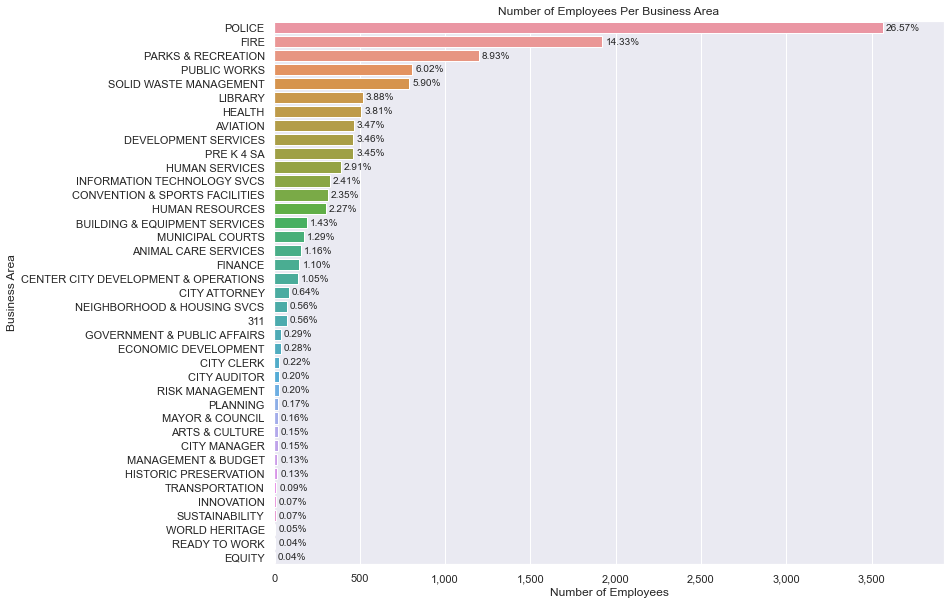

In [42]:
#set up and size the figure
plt.figure(figsize=(12,10))

#plot
ax = sns.barplot(y=num_employees.index, x= num_employees.values)

#set titles and labels
labels = ax.set(xlabel='Number of Employees', ylabel='Business Area', title='Number of Employees Per Business Area')

#add the percentage labels
annotations = ax.bar_label(ax.containers[0],labels=['%.2f%%' % n for n in percent_employment], padding=3)
ax.margins(x=0.1)

#give thousand seperator to x axis
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

#save the graph if you want to
if record:
    plt.savefig('1.3_Number of Employees Per Business Area.png')

### What business area spends the most on salaries?

In [43]:
percent_compensation = ba_vs_tc/ba_vs_tc.sum()*100

In [44]:
percent_compensation.sort_values(ascending=False,inplace=True)

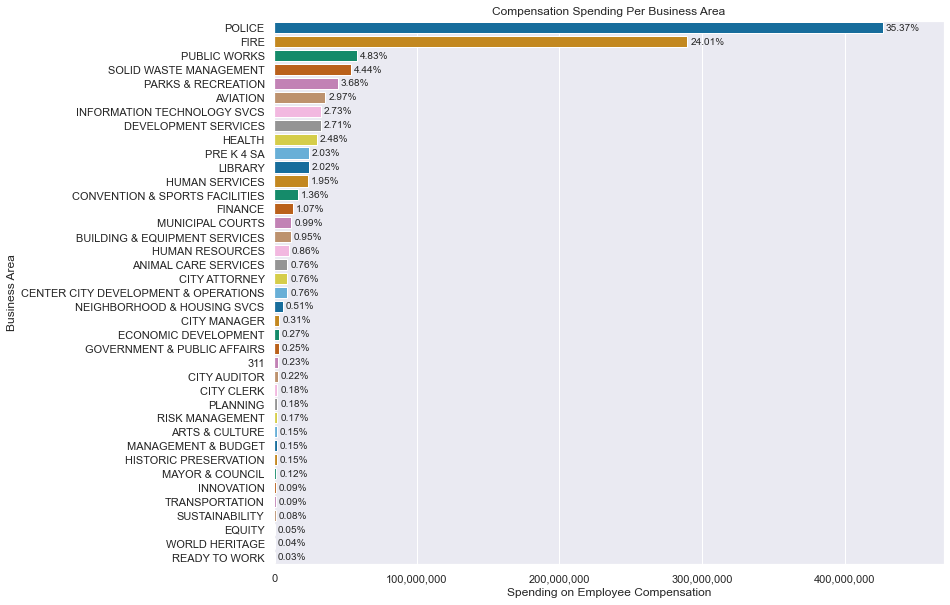

In [45]:
#set up and size the figure
plt.figure(figsize=(12,10))

#plot
palette = sns.color_palette("colorblind")
ax = sns.barplot(y=ba_vs_tc.index, x=ba_vs_tc.values,palette=palette)

#set titles and labels
labels = ax.set(xlabel='Spending on Employee Compensation', ylabel='Business Area', title='Compensation Spending Per Business Area')

#add the percentage labels
annotations = ax.bar_label(ax.containers[0],labels=['%.2f%%' % n for n in percent_compensation], padding=3)
ax.margins(x=0.1)

#give thousand seperator to x axis
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

#save the graph if you want to
if record:
    plt.savefig('1.4_Total Employee Compensation by Business Area.png')

# % emp by BA vs % comp by BA

In [46]:
perc_per_ba = pd.DataFrame(ba_vs_tc/ba_vs_tc.sum()*100).sort_values(by='total_compensation',ascending=False)

if record:
    dfi.export(perc_per_ba,"2_perc_per_ba.png")

In [47]:
comparepercentages = pd.DataFrame()
comparepercentages['p_of_total_compensation'] = perc_per_ba
comparepercentages['p_of_total_employment'] =(num_employees/comp['first_name'].count()*100)
comparepercentages['difference'] = (comparepercentages['p_of_total_compensation']-comparepercentages['p_of_total_employment'])
comparepercentages['proportion'] = (comparepercentages['p_of_total_compensation']/comparepercentages['p_of_total_employment'])

comparepercentages.sort_values('difference',inplace=True)
comparepercentages['BA_tags'] =  comparepercentages.index.map(BA_tags)

In [48]:
comparepercentages.sort_values('p_of_total_employment',inplace=True)

In [49]:
show_tags = comparepercentages.loc[['FIRE','POLICE','PARKS & RECREATION']]

In [50]:
#make a function to show labels on the plot

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.01, point['y'], str(point['val']))

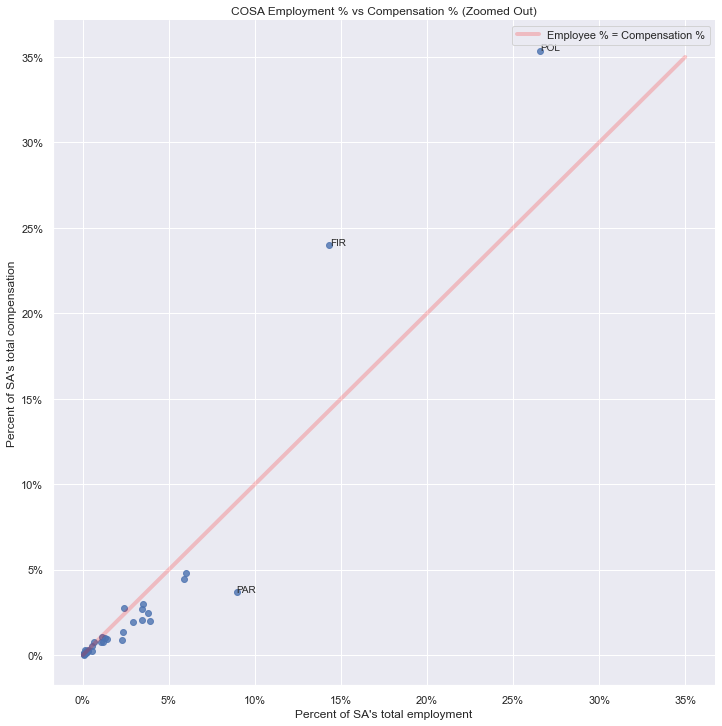

In [51]:
#make a scatterplot
ax = sns.lmplot(x='p_of_total_employment', # Horizontal axis
           y='p_of_total_compensation', # Vertical axis
           data=comparepercentages, # Data source
           fit_reg=False, # don't fit regression line (we will do this later as red)
           height = 10, # size and dimension
           aspect =1) 

#Make a y=x line that's red
ax =sns.lineplot(x=list(range(0,36)),
            y=list(range(0,36)),
                 color='red',
                alpha=.2,
                lw=4,
                 label='Employee % = Compensation %')
plt.legend()

#give percent sign seperator to x and y axis
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}%'))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}%'))

#Set title
plt.title('COSA Employment % vs Compensation % (Zoomed Out)')
# Set x-axis label
plt.xlabel("Percent of SA's total employment")
# Set y-axis label
plt.ylabel("Percent of SA's total compensation")

#show BA tags
label_point(x=show_tags.p_of_total_employment,
            y=show_tags.p_of_total_compensation,
            val=show_tags.BA_tags,
            ax=plt.gca())

plt.show()

In [52]:
#drop the labels we showed last time from data (zoom in)
cpdropped = comparepercentages.drop(['FIRE','POLICE','PARKS & RECREATION'])
                                    #[comparepercentages.p_of_total_employment >1.1]
#set new labels to show
show_tags = comparepercentages[(comparepercentages['p_of_total_employment']<6.03) 
                               & (comparepercentages['p_of_total_employment']>2.26)]

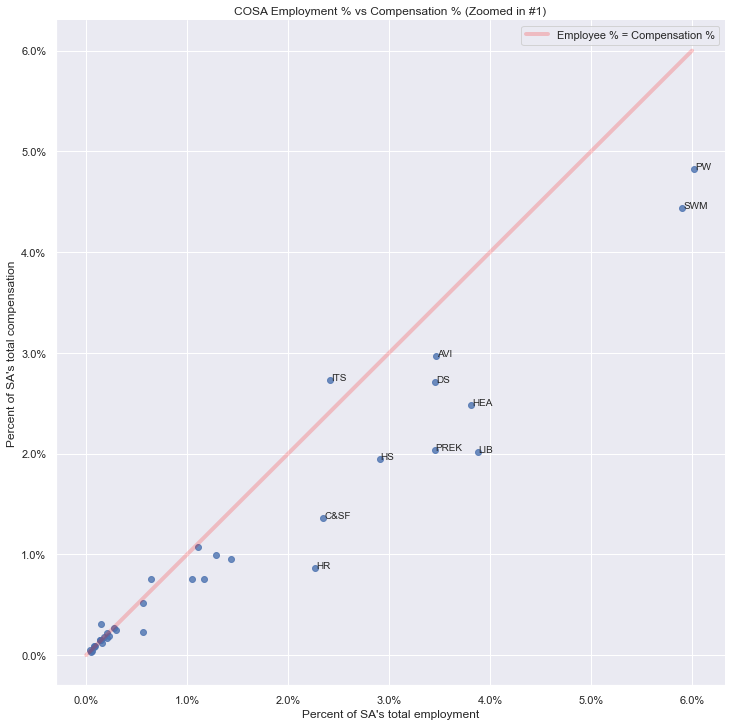

In [53]:
# Zoom #1 
ax = sns.lmplot(x='p_of_total_employment', # Horizontal axis
           y='p_of_total_compensation', # Vertical axis
           data=cpdropped, # Data source
           fit_reg=False, # Don't fix a regression line
           height = 10, 
           aspect = 1 ) # size and dimension

#Make a regression line that's red
ax =sns.lineplot(x=list(range(0,7)),
            y=list(range(0,7)),
                 color='red',
                alpha=.2,
                lw=4,
                 label='Employee % = Compensation %')
plt.legend()

#give percent sign seperator to x and y axis
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}%'))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}%'))


plt.title('COSA Employment % vs Compensation % (Zoomed in #1)')
# Set x-axis label
plt.xlabel("Percent of SA's total employment")
# Set y-axis label
plt.ylabel("Percent of SA's total compensation")

label_point(x=show_tags.p_of_total_employment,
            y=show_tags.p_of_total_compensation,
            val=show_tags.BA_tags,
            ax=plt.gca())

In [54]:
cpdropped = comparepercentages[(comparepercentages['p_of_total_employment']<1.5)]

show_tags = comparepercentages[(comparepercentages['p_of_total_employment']<1.5) &
                               (comparepercentages['p_of_total_employment']>.4)]

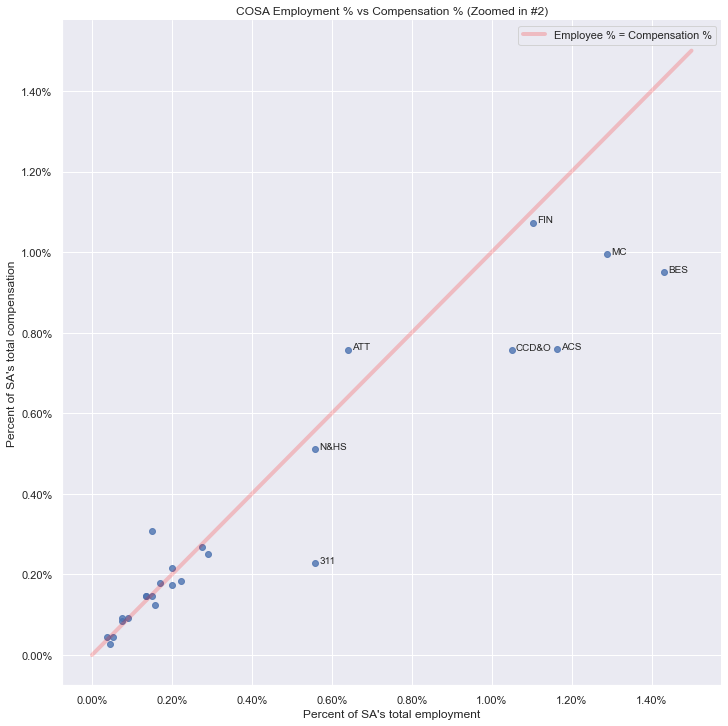

In [55]:
ax = sns.lmplot(x='p_of_total_employment', # Horizontal axis
           y='p_of_total_compensation', # Vertical axis
           data = cpdropped, # Data source
           fit_reg=False, # Don't fix a regression line
           height = 10, 
           aspect = 1 ) # size and dimension

#Make a y=x line that's red
ax = sns.lineplot(x=np.arange(0.0, 1.6, 0.1),
                  y=np.arange(0.0, 1.6, 0.1),
                  color='red',
                alpha=.2,
                lw=4,
                  label='Employee % = Compensation %')
plt.legend()

#give percent sign seperator to x and y axis
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.2f}%'))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.2f}%'))

plt.title('COSA Employment % vs Compensation % (Zoomed in #2)')
# Set x-axis label
plt.xlabel("Percent of SA's total employment")
# Set y-axis label
plt.ylabel("Percent of SA's total compensation")

label_point(x=show_tags.p_of_total_employment,
            y=show_tags.p_of_total_compensation,
            val=show_tags.BA_tags,
            ax=plt.gca())

In [56]:
show_tags = comparepercentages[comparepercentages['p_of_total_employment']<.4]

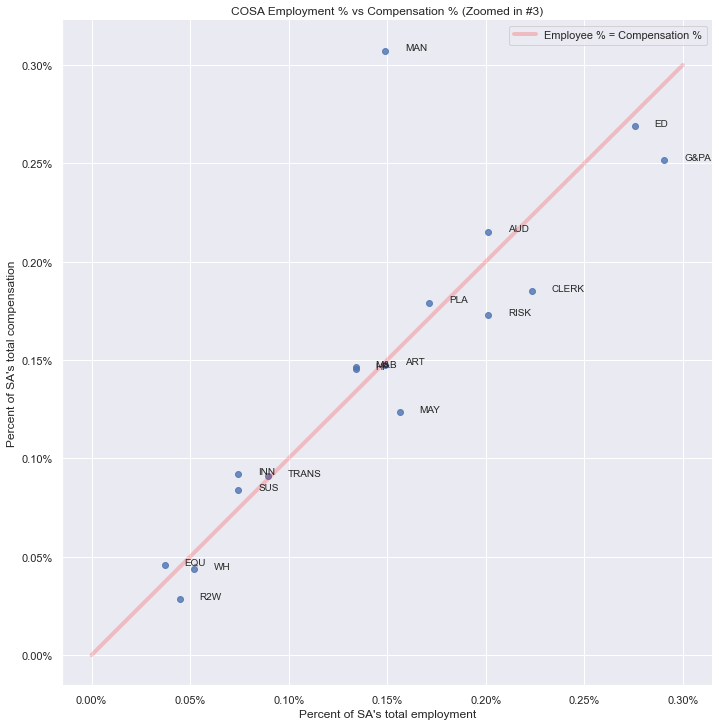

In [57]:
ax = sns.lmplot(x='p_of_total_employment', # Horizontal axis
           y='p_of_total_compensation', # Vertical axis
           data=show_tags, # Data source
           fit_reg=False, # Don't fix a regression line
           height = 10, 
           aspect = 1 ) # size and dimension

#Make a y=x line that's red
ax = sns.lineplot(x=np.arange(0.0, .4, 0.1),
                  y=np.arange(0.0, .4, 0.1),
                  color='red',
                alpha=.2,
                lw=4,label='Employee % = Compensation %')
plt.legend()

#give percent sign seperator to x and y axis
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.2f}%'))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.2f}%'))

plt.title('COSA Employment % vs Compensation % (Zoomed in #3)')
# Set x-axis label
plt.xlabel("Percent of SA's total employment")
# Set y-axis label
plt.ylabel("Percent of SA's total compensation")

label_point(x=show_tags.p_of_total_employment,
            y=show_tags.p_of_total_compensation,
            val=show_tags.BA_tags,
            ax=plt.gca())

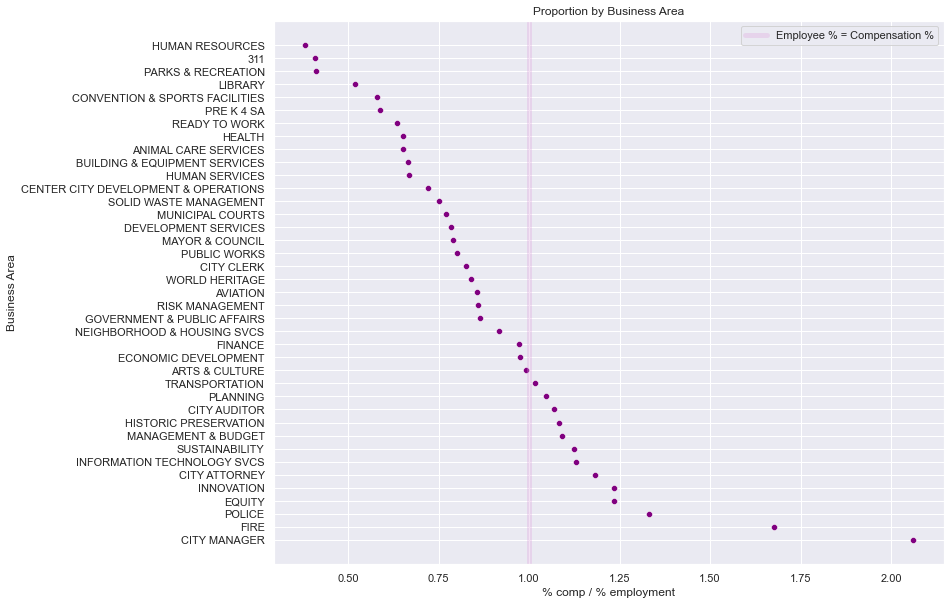

In [58]:
plt.figure(figsize=(12,10))

ax =sns.scatterplot(data=comparepercentages.sort_values('proportion'),
             x='proportion',
             y='business_area',
                   color = 'purple')\

#create verticle line
ax.axvline(x=1,color='plum',
          lw=5,
           alpha=.3,
           label='Employee % = Compensation %')
plt.legend()

ax.set_title('Proportion by Business Area')
ax.set_xlabel('% comp / % employment')
ax.set_ylabel('Business Area')

#ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.2f}%'))
plt.show()

### Part time and temp employees

In [59]:
#the data above could be skewed. Maybe HR, 311, Parks, etc. have the most part time/temp employees which would skew the data

In [60]:
#make subset of data without part timers
full_time = comp[comp['employee_subgroup'] != '4C PART-TIME']

#also remove temp employees from that subset
full_time = full_time[full_time['employee_subgroup'] != '4C TEMP']

#how many full timers are there?
num_FT_emp = len(full_time)
print(f'There are {num_FT_emp} full-timer employees that work for The City of San Antonio')

#how many people did we get rid of?
num_PT_TEMPS = (len(comp) - num_FT_emp)
print(f'There are {num_PT_TEMPS} part-timers or temporary employees that work for The City of San Antonio')

There are 12692 full-timer employees that work for The City of San Antonio
There are 727 part-timers or temporary employees that work for The City of San Antonio


In [61]:
FT_ba_vs_tc = full_time.groupby(by='business_area')['total_compensation'].sum().sort_values(ascending=False)

print('Total COSA spending on Full Timer compensation: ' f'{ba_vs_tc.sum():,.0f}')

Total COSA spending on Full Timer compensation: 1,206,680,843


In [62]:
FT_perc_per_ba = pd.DataFrame(FT_ba_vs_tc/FT_ba_vs_tc.sum()*100).sort_values(by='total_compensation',ascending=False)

if record:
    dfi.export(perc_per_ba,"2_FT_perc_per_ba.png")

FT_comparepercentages = pd.DataFrame()
FT_comparepercentages['p_of_total_compensation'] = FT_perc_per_ba
FT_comparepercentages['p_of_total_employment'] =(num_employees/comp['first_name'].count()*100)
FT_comparepercentages['difference'] = (FT_comparepercentages['p_of_total_compensation']-FT_comparepercentages['p_of_total_employment'])
FT_comparepercentages['proportion'] = (FT_comparepercentages['p_of_total_compensation']/FT_comparepercentages['p_of_total_employment'])

FT_comparepercentages.sort_values('difference',inplace=True)
FT_comparepercentages['BA_tags'] =  FT_comparepercentages.index.map(BA_tags)

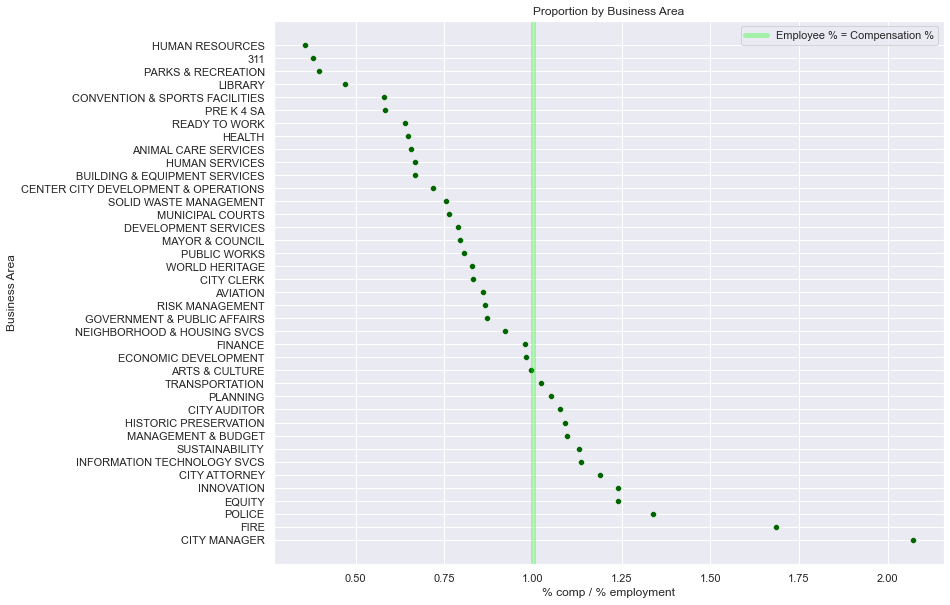

In [63]:
plt.figure(figsize=(12,10))

ax =sns.scatterplot(data=FT_comparepercentages.sort_values('proportion'),
             x='proportion',
             y='business_area',
                   color = 'darkgreen')

#create verticle line
ax.axvline(x=1,color='lime',
           lw=5,
           alpha=.3,
          label='Employee % = Compensation %')
plt.legend()

ax.set_title('Proportion by Business Area')
ax.set_xlabel('% comp / % employment')
ax.set_ylabel('Business Area')

plt.show()

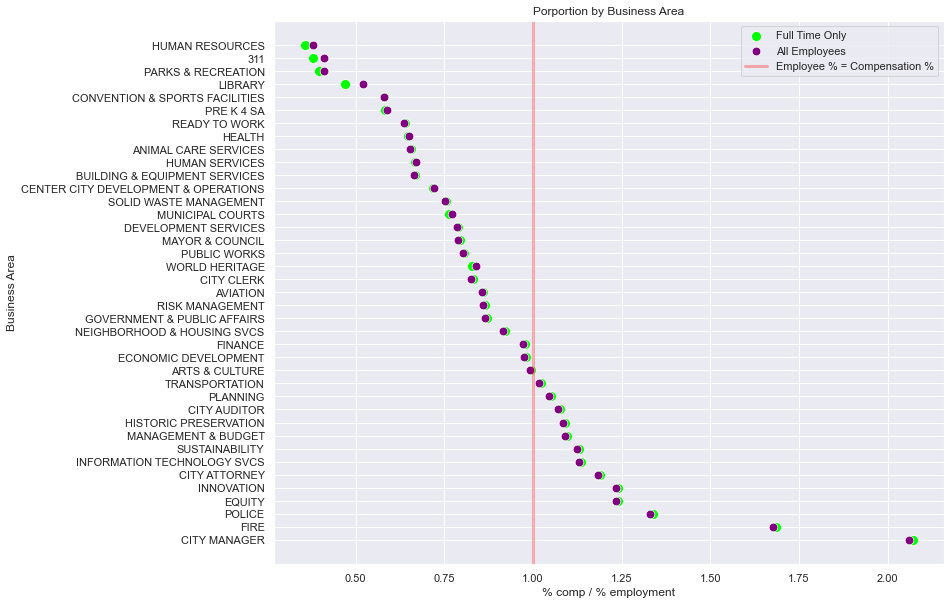

In [64]:
#let's try plotting them at the same time

plt.figure(figsize=(12,10))

#full time scatterplot
ax1 =sns.scatterplot(data=FT_comparepercentages.sort_values('proportion'),
             x='proportion',
             y='business_area',
                   color = 'lime',
                    label='Full Time Only',
                    s=100)

#original scatterplot
ax2 =sns.scatterplot(data=comparepercentages.sort_values('proportion'),
             x='proportion',
             y='business_area',
                   color = 'purple',
                    label='All Employees',
                    s=75)

#create verticle line
ax3 = plt.axvline(x=1,
            color='red',
            lw=3,
           alpha=.3,
           label='Employee % = Compensation %')
plt.legend()

#set tiles and axes
ax1.set_title('Porportion by Business Area')
ax1.set_xlabel('% comp / % employment')
ax1.set_ylabel('Business Area')


plt.show()

## What is the average total compensation for a city job?

In [65]:
avg_sal = comp['total_compensation'].mean()     
print("The average COSA employee's yearly total compensation is: " + f'{avg_sal:,.0f}$')

The average COSA employee's yearly total compensation is: 89,923$


## What is the average total compensation for a Library job?

In [66]:
avg_lib_sal = comp[comp['business_area']=='LIBRARY']['total_compensation'].mean()
print("The average Library employee's yearly total compensation is: " + f'{avg_lib_sal:,.0f}$')

The average Library employee's yearly total compensation is: 46,772$


## What business area has the average highest total compensation per employee?

In [67]:
# to do that we will need the info from the two questions above

comp_per_empl = (comp.groupby(by='business_area')['total_compensation'].sum()/comp['business_area']
 .value_counts()).sort_values(ascending=False).round(2)

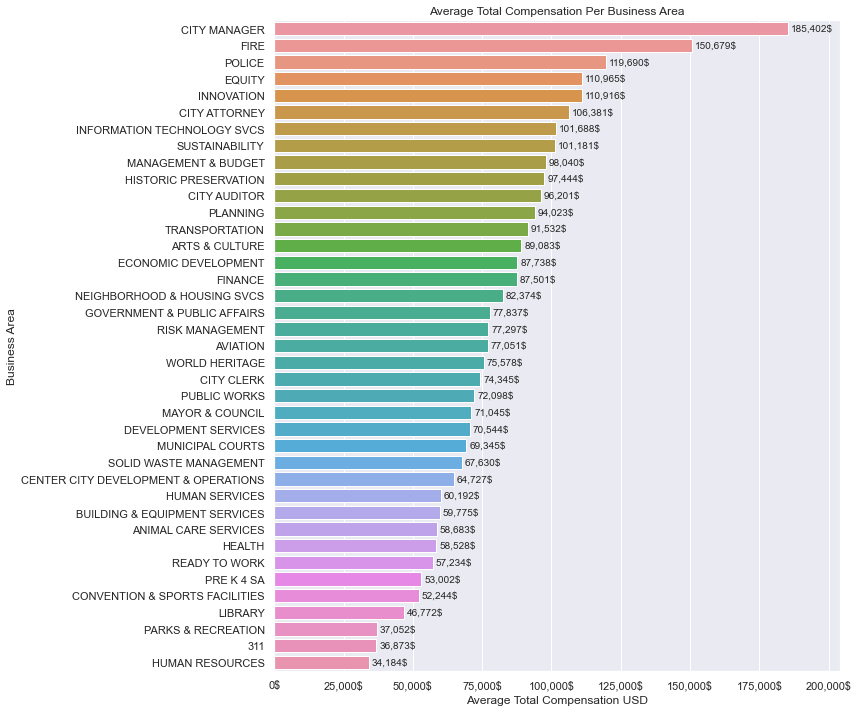

In [68]:
#### TRYING STUFF

#set up figure
plt.figure(figsize=(12,10))



plt.ylabel('Business Area')

#plot
ax = sns.barplot(y=comp_per_empl.index, x=comp_per_empl.values)

#set title and lables
plt.title('Average Total Compensation Per Business Area')
plt.xlabel('Average Total Compensation USD')
    #make x label have thousand seperators
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}$'))

#add the percentage labels
annotations = ax.bar_label(ax.containers[0],labels=[f'{x:,.0f}$' for x in comp_per_empl], padding=3)
ax.margins(x=0.1)

#make it look nice
plt.tight_layout()

if record:
    plt.savefig('3.1_Average Annual Salary Per Business Area.png')

## What are the best and worst jobs by annual salary?

#### How many unique jobs are there?

In [69]:
comp['job_title'].nunique()

847

#### Best Paying Jobs

In [70]:
#what are the the top 50 jobs with the highest total compensation?


best_jobs = pd.DataFrame(comp.groupby('job_title')['annual_salary'].mean().sort_values(ascending=False).head(50))

best_jobs['annual_salary'] = best_jobs['annual_salary'].apply(lambda x:"${0:,.0f}".format(x))
best_jobs = best_jobs.style.background_gradient() 

if record:
    dfi.export(best_jobs,"4_best_jobs.png")

In [71]:
best_jobs

,annual_salary
job_title,
CITY MANAGER,"$312,000"
CITY ATTORNEY,"$299,626"
DEPUTY CITY MANAGER,"$258,825"
CHIEF FINANCIAL OFFICER,"$233,931"
POLICE CHIEF,"$232,298"
ASSISTANT CITY MANAGER,"$226,319"
FIRE CHIEF,"$222,090"
CHIEF INFORMATION OFFICER,"$219,587"
PUBLIC HEALTH DIRECTOR,"$215,000"


In [72]:
#what are the the lowest 20 jobs with the lowest average salary? 
worst_jobs = pd.DataFrame(comp.groupby('job_title')['annual_salary'].mean().sort_values().head(50))
worst_jobs['annual_salary'] = worst_jobs['annual_salary'].apply(lambda x:"${0:,.0f}".format(x))
if record:
    dfi.export(worst_jobs,"5_worst_jobs.png")

#### Worst Paying Jobs

In [73]:
worst_jobs

,annual_salary
job_title,
TEMPORARY SUMMER EMPLOYEE,"$18,720"
STUDENT INTERN II,"$20,461"
RECREATION ASSISTANT,"$20,487"
PUBLIC SERVICE ATTENDANT,"$20,988"
LIFEGUARD,"$22,887"
PARKING ATTENDANT,"$25,211"
SWIMMING POOL SUPERVISOR,"$26,926"
RECREATION SPECIALIST,"$27,726"
SUBSTITUTE TEACHER,"$27,760"


## Are there any trends in hire date or termination date?

In [74]:
comp['withdraw_month'] = comp['withdraw_date'].apply(lambda x: x.month)

In [75]:
#lets make a sub data base of the employees who were let go, that way we don't have to deal with NaNs

In [76]:
let_go = comp[~comp['withdraw_month'].isna()]

In [77]:
let_go['withdraw_month'] = let_go['withdraw_month'].apply(lambda x:str(int(x)))

C:\Users\dansc\AppData\Local\Temp\ipykernel_23188\2398343627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  let_go['withdraw_month'] = let_go['withdraw_month'].apply(lambda x:str(int(x)))


In [78]:
month = {	'1':'January',
		'2':'February',
		'3':'March',
		'4':'April',
		'5':'May',
		'6':'June',
		'7':'July',
		'8':'August',
		'9':'September',
		'10':'October',
		'11':'November',
		'12':'December'		}

In [79]:
let_go['withdraw_month'] = let_go['withdraw_month'].map(month)

C:\Users\dansc\AppData\Local\Temp\ipykernel_23188\396516167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  let_go['withdraw_month'] = let_go['withdraw_month'].map(month)


In [80]:
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

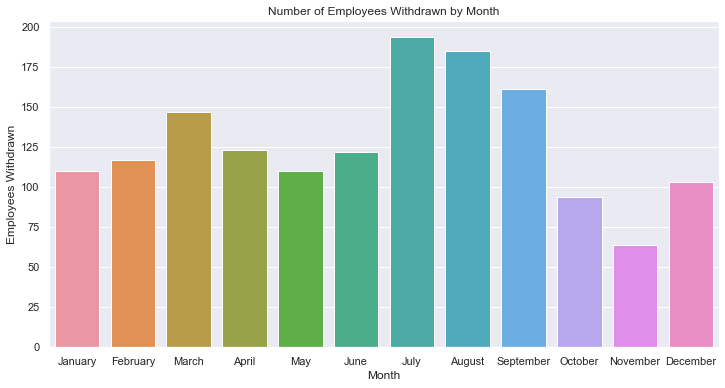

In [81]:
#set up the figure
plt.figure(figsize=(12,6))
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

#plot
sns.countplot(data=let_go,x='withdraw_month',order=month_order)

#labels and title
plt.ylabel('Employees Withdrawn')
plt.xlabel('Month')
plt.title('Number of Employees Withdrawn by Month')

#show
plt.show()

if record:
    plt.savefig('5.1_Number of Employees Withdrawn by Month.png')

## What were the ethnic orgins of the employees let go? And how does that compare to the percentage of that ethnic group in the city? 

#### Total employees let go

In [82]:
#total employees let go
let_go['first_name'].count()

1530

In [83]:
#### Total employ

In [84]:
#Total employees count by ethnicity
totalEmp_byEthnicity = pd.DataFrame(comp.groupby('ethnic_orgin').count()['first_name'])
totalEmp_byEthnicity['first_name'] = totalEmp_byEthnicity['first_name'].apply(lambda x: "{0:,.0f}".format(x))
if record:
    dfi.export(totalEmp_byEthnicity,"7_totalEmp_byEthnicity.png")


In [85]:
#Percentage of employees let go by ethnicity
decimal_letgo_be = let_go.groupby('ethnic_orgin').count()['first_name']/let_go['first_name'].count()
#format it as a percent
p_letgo_be = decimal_letgo_be.sort_values().apply(lambda x:"{0:,.2f}%".format(x*100))


In [86]:
#total employees
comp['first_name'].count()

13419

In [87]:
#percentage of employees total by ethnicity
decimal_total_be = comp.groupby('ethnic_orgin').count()['first_name']/comp['first_name'].count()

#format it as a percent
p_total_be = decimal_total_be.sort_values().apply(lambda x:"{0:,.2f}%".format(x*100))


In [88]:
#let's zip the two datasets together as one...

byEthnicity = pd.DataFrame()
byEthnicity['ethnicity'] = decimal_letgo_be.index
byEthnicity['total'] = decimal_total_be.values*100
byEthnicity['withdrawn'] = decimal_letgo_be.values*100
byEthnicity['difference'] = byEthnicity['total']-byEthnicity['withdrawn']
byEthnicity.sort_values('difference',inplace=True)

difference = byEthnicity['difference']


#let's create tags as well so it will fit better
ethnicity_map = {'AMERICAN INDIAN OR ALASKA NATIVE (NONHISPANIC/LAT)':'Ind/Ala',
 'ASIAN (NON HISPANIC OR LATINO)':'Asian',
 'BLACK OR AFRICAN AMERICAN (NON HISPANIC OR LATINO)':'Black',
 'HISPANIC OR LATINO':'Hisp/Lat',
 'NATIVE HAWAIIAN/OTHER PACIFIC ISLANDER (NON HIS)':'Haw/Pac',
 'OTHER':'OTHER',
 'TWO OR MORE RACES (NON HISPANIC OR LATINO)':'2orMore',
 'WHITE (NON HISPANIC OR LATINO)':'white'}

#map those tags and assign them to rows in our dataframe
byEthnicity['ethnicity_tags'] =  byEthnicity['ethnicity'].map(ethnicity_map)
byEthnicity.set_index('ethnicity_tags',inplace=True)


In [89]:
len(x)

5

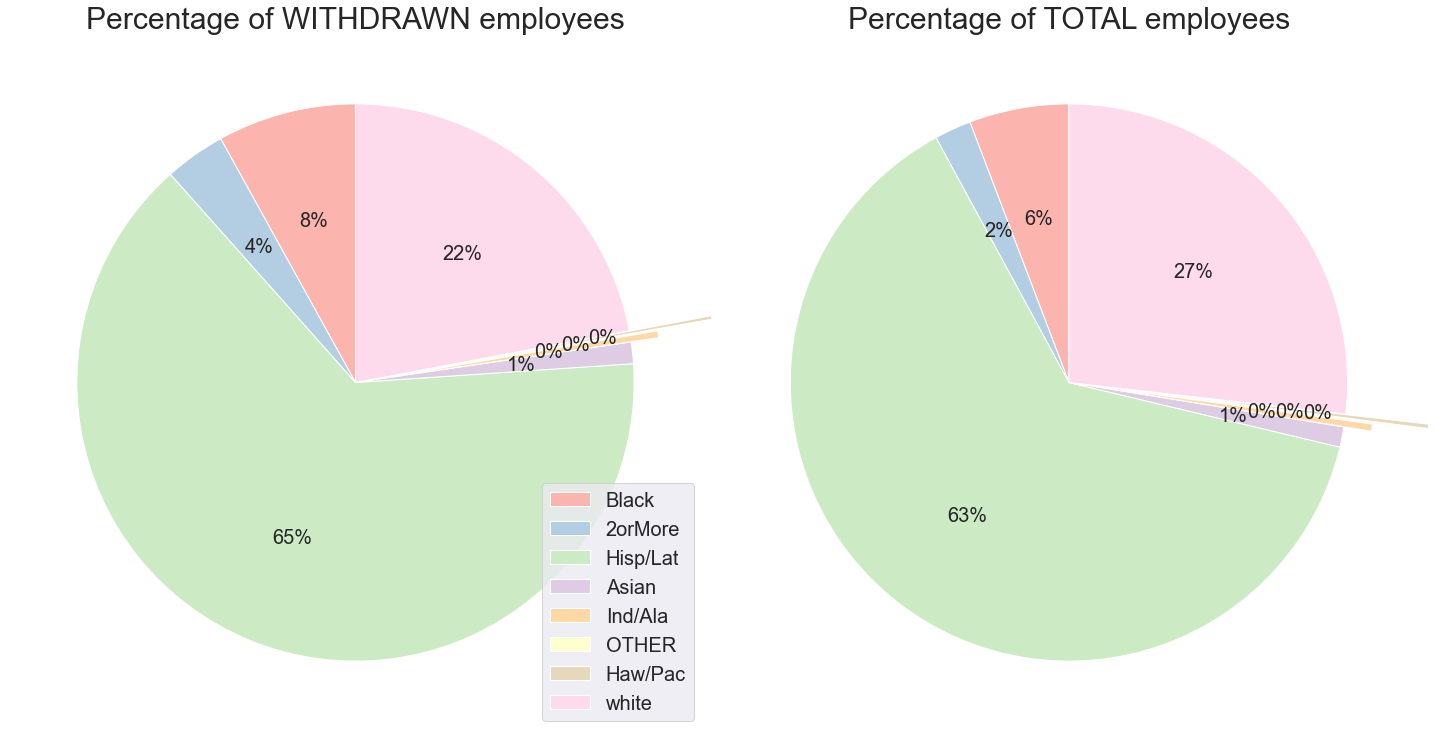

In [90]:
#ax1,ax2 set up 2 two pies
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,40)) #ax1,ax2 refer to your two pies

#set colors and explode
colors = sns.color_palette('Pastel1')
explode = [0, 0, 0, 0, 0.1, 0.2, 0.3, 0]

#--------------------------------------WITHDRAWN PIE #1-----------------------------
#set variables and title

labels = byEthnicity.index
sizes = byEthnicity['withdrawn']
ax1.set_title('Percentage of WITHDRAWN employees',
              fontsize='30')

#plot
ax1.pie(sizes,
        colors=colors,
        startangle=90,
        explode=explode,
        autopct='%.0f%%',
       textprops={'fontsize': 20})

ax1.legend(labels,loc='lower right',fontsize='20')

#---------------------------------------TOTAL PIE #2----------------------------------
#set variables and title
labels = byEthnicity.index
sizes = byEthnicity['total']
ax2.set_title('Percentage of TOTAL employees',
             fontsize = '30')

#plot
ax2.pie(sizes,
        colors=colors,
        startangle=90,
        explode=explode,
       autopct='%.0f%%',
       textprops={'fontsize': 20})

# make look nice
fig.autofmt_xdate()
plt.tight_layout()

if record:
    plt.savefig('8.1_Total vs Withdrawn by ethntic orgin PIE.png')

### Now as a barchart

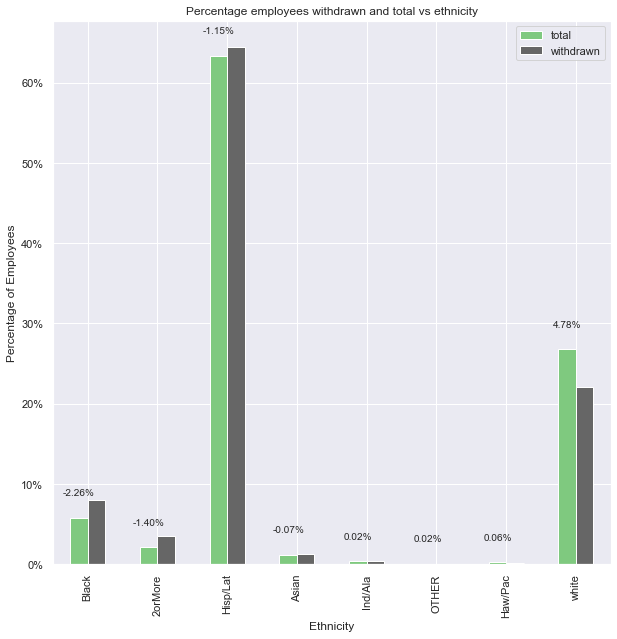

In [91]:
#plot
ax = byEthnicity[['total','withdrawn']].plot(figsize=(10,10),kind='bar',cmap='Accent')

#make y axis in percents
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}%'))

#set labels and titles
plt.xlabel('Ethnicity')
plt.ylabel('Percentage of Employees')
plt.title('Percentage employees withdrawn and total vs ethnicity')

#show difference between total and withdrawn employees
annotations = ax.bar_label(ax.containers[0],labels=['%.2f%%' % n for n in difference], padding=20)

#show
plt.show()

if record:
    plt.savefig('8.2_Percentage employees withdrawn and total vs ethnicity'.png)

## Who are the top 20 earners in the library Business Area

In [92]:
#To avoid duplicate names (there is a patricia perez also in parks and rec and as a enforcement officer)
#let's make a splice of the database that is just library workers.

library_comp = comp[comp['business_area'] == 'LIBRARY']

In [93]:
top_20_library = library_comp[['full_name','job_title','annual_salary']].sort_values(
    'annual_salary', ascending=False).head(20)

top_20_library['annual_salary'] = top_20_library['annual_salary'].apply(lambda x:"${0:,.0f}".format(x))

if record:
    dfi.export(top_20_library,"9_top_20_library.png")

In [94]:
top_20_library

,full_name,job_title,annual_salary
68,RAMIRO S. SALAZAR,LIBRARY DIRECTOR,"$188,549"
636,KATHLEEN ELAINE DONELLAN,ASSISTANT LIBRARY DIRECTOR,"$138,084"
618,DALE MCNEILL,ASST LIBRARY DIRECTOR,"$137,397"
3323,RICH WALKER,PROJECT CONTROL MANAGER,"$106,248"
3511,RAYMOND FRAGA,SPECIAL PROJECTS MANAGER,"$100,756"
4018,CHERYL LYNN SHEEHAN,PUBLIC SERVICES ADMINISTRATOR,"$94,044"
4298,GABRIELLA RAUSCHUBER,DEPARTMENT FISCAL ADMINISTRATOR,"$91,571"
4294,JENNIFER JOAN VELASQUEZ,LIBRARY SERVICES MANAGER,"$91,099"
4771,KATHRYN W STURTZ,LIBRARY SERVICES MANAGER,"$91,099"
4333,JESSICA ELIZABETH ZURITA,EXECUTIVE ASSISTANT,"$89,739"


# LIBRARY

In [95]:
#To avoid duplicate names (there is a patricia perez also in parks and rec and as a enforcement officer)
#let's make a splice of the database that is just library workers.

library_comp = comp[comp['business_area'] == 'LIBRARY']
library_comp['first_last'] = library_comp['first_name'] + ' ' + library_comp['last_name']
library_comp['dif_mean_years'] = library_comp['years_service']-library_comp['years_service'].mean() #distance from mean years
library_comp['dif_mean_comp'] = library_comp['total_compensation']-library_comp['total_compensation'].mean() #distance from mean compensation


C:\Users\dansc\AppData\Local\Temp\ipykernel_23188\3753386995.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  library_comp['first_last'] = library_comp['first_name'] + ' ' + library_comp['last_name']
C:\Users\dansc\AppData\Local\Temp\ipykernel_23188\3753386995.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  library_comp['dif_mean_years'] = library_comp['years_service']-library_comp['years_service'].mean() #distance from mean years
C:\Users\dansc\AppData\Local\Temp\ipykernel_23188\3753386995.py:7: Set

In [96]:
library_comp.head()

,first_name,middle_name,last_name,employee_category,hire_date,base_pay,leave_payout,other_pay,overtime,gross_earnings,...,annual_salary,additional_benefits,business_area,BA_tags,years_service,full_name,withdraw_month,first_last,dif_mean_years,dif_mean_comp
68,RAMIRO,S.,SALAZAR,CIVILIAN,2005-04-04,"188,549.14","7,252.00","6,456.82",0.00,"202,257.96",...,"188,549.14","51,847.13",LIBRARY,LIB,18.23,RAMIRO S. SALAZAR,NaN,RAMIRO SALAZAR,6.68,"207,332.67"
618,DALE,NaN,MCNEILL,CIVILIAN,2012-10-08,"137,397.00","5,284.80","6,456.82",0.00,"149,138.62",...,"137,397.00","41,849.05",LIBRARY,LIB,10.72,DALE MCNEILL,NaN,DALE MCNEILL,-0.83,"144,215.25"
636,KATHLEEN,ELAINE,DONELLAN,CIVILIAN,2005-08-08,"138,084.18","3,983.40","6,456.82",0.00,"148,524.40",...,"138,084.18","41,725.94",LIBRARY,LIB,17.89,KATHLEEN ELAINE DONELLAN,NaN,KATHLEEN DONELLAN,6.34,"143,477.92"
3323,RICH,NaN,WALKER,CIVILIAN,2005-03-07,"106,247.96",0.00,"1,056.82",0.00,"107,304.78",...,"106,247.96","30,233.93",LIBRARY,LIB,18.31,RICH WALKER,NaN,RICH WALKER,6.76,"90,766.29"
3511,RAYMOND,NaN,FRAGA,CIVILIAN,2005-09-06,"100,756.24","3,875.20",0.00,0.00,"104,631.44",...,"100,756.24","29,834.28",LIBRARY,LIB,17.81,RAYMOND FRAGA,NaN,RAYMOND FRAGA,6.26,"87,693.30"


In [98]:
library_comp['years_service']

68      18.23
618     10.72
636     17.89
3323    18.31
3511    17.81
         ... 
13118    3.67
13123    1.85
13133    1.83
13147    4.59
13150    4.01
Name: years_service, Length: 520, dtype: float64

<Figure size 1080x1080 with 0 Axes>

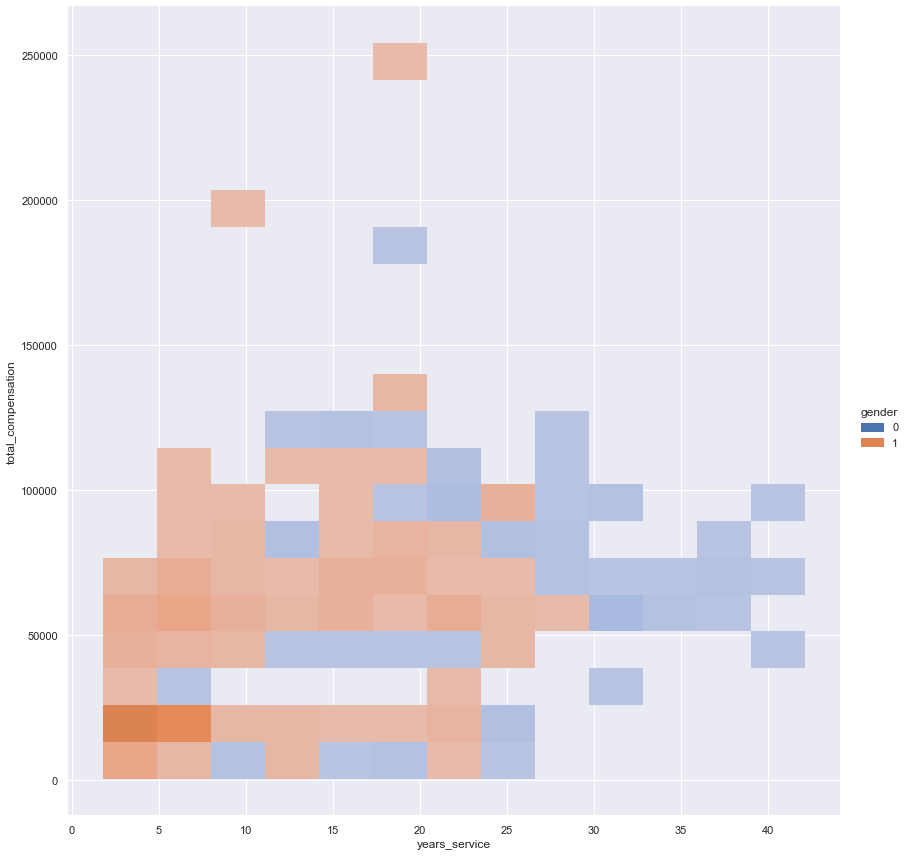

In [99]:
plt.figure(figsize=(15,15))

sns.displot(data=library_comp,
            x='years_service',
            y='total_compensation',
            hue='gender',
            height=12
           )

## Reference Department

In [100]:
#list of employees I work with
reference_employees = ['ARLAND SCHNACKER','BETTINA HERNANDEZ','CHRISTINA MONTERO',
                       'CYNTHIA DELION',' DAN SCHUMACHER','DAVID GALLIN-PARISI',
                       'EMERSON STANLEY','J.D. ELIZONDO','JORDAN TORRES',
                       'JOSHUA YURCHESHEN','JULIA SELWYN','LETICIA GUERRA',
                       'MELISSA GOMEZ','MICHELLE VILLARREAL','PANNAGA PRASAD',
                       'PATRICIA PEREZ','RAQUEL REYES','SALLY BAUER',
                       'SARA DE LA ROSA','STACEY MARTINEZ','VALERIE SAUCEDA',
                       'BRIANNA GLASS','ANGELINA CORTES'
                      ]

In [101]:
#There are 21 employees
len(reference_employees)

23

In [102]:
#11 of them were found in the database
library_comp['first_last'].isin(values=reference_employees).value_counts()

False    504
True      16
Name: first_last, dtype: int64

In [103]:
reference_dep = library_comp.loc[library_comp['first_last'].isin(reference_employees)]

In [104]:
#Why did Leticia get paid so little?

#it's not her hire date she was hired in july? I'll ask her.
library_comp[(library_comp['first_last']=='LETICIA GUERRA')]['hire_date']

12778   2021-07-10
Name: hire_date, dtype: datetime64[ns]

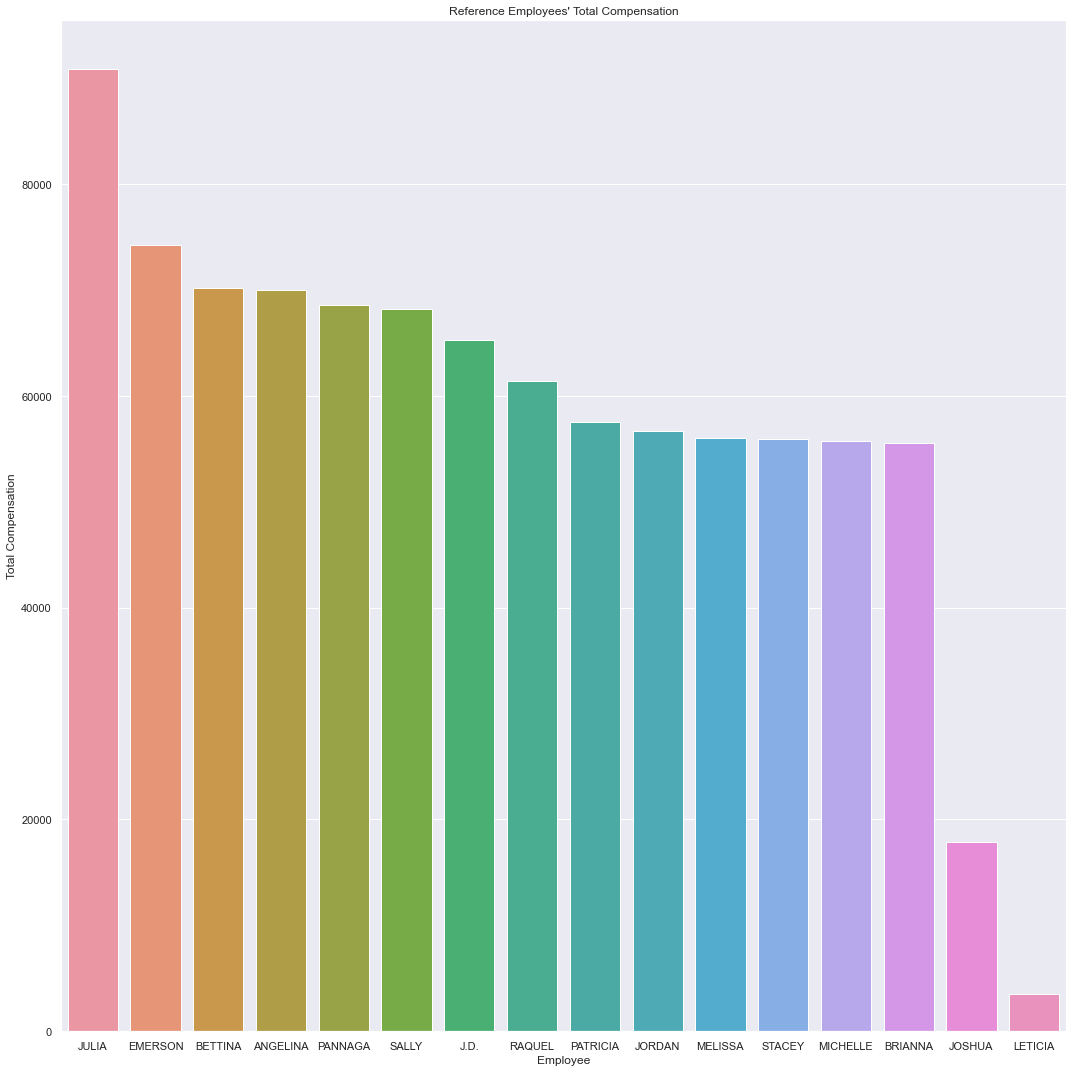

In [105]:
#set up the figure
plt.figure(figsize=(15,15))

#plot
sns.barplot(data = reference_dep[['first_name','total_compensation']],x='first_name',y='total_compensation')

#set labels and title
plt.xlabel('Employee')
plt.ylabel('Total Compensation')
plt.title("Reference Employees' Total Compensation")

#make look nice
plt.tight_layout()

if record:
    plt.savefig('9.1_Reference Employees Total Compensation.png')

### How does this graph compare to year's worked?

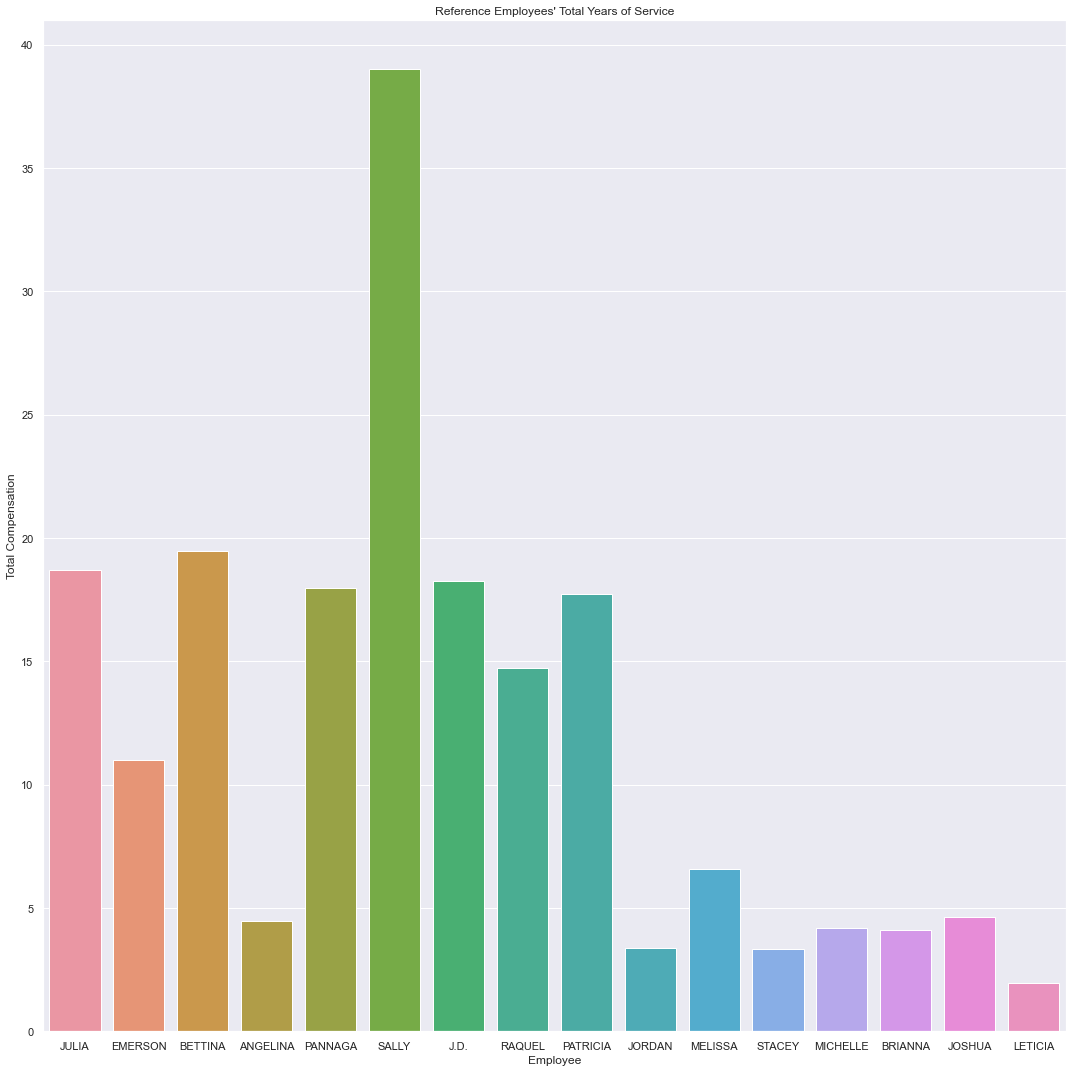

In [106]:
#set up the figure
plt.figure(figsize=(15,15))

#plot
sns.barplot(data = reference_dep,x='first_name',y='years_service')

#set labels and title
plt.xlabel('Employee')
plt.ylabel('Total Compensation')
plt.title("Reference Employees' Total Years of Service")

#make look nice
plt.tight_layout()

if record:
    plt.savefig('9.2_Reference Employees Total Years of Service.png')

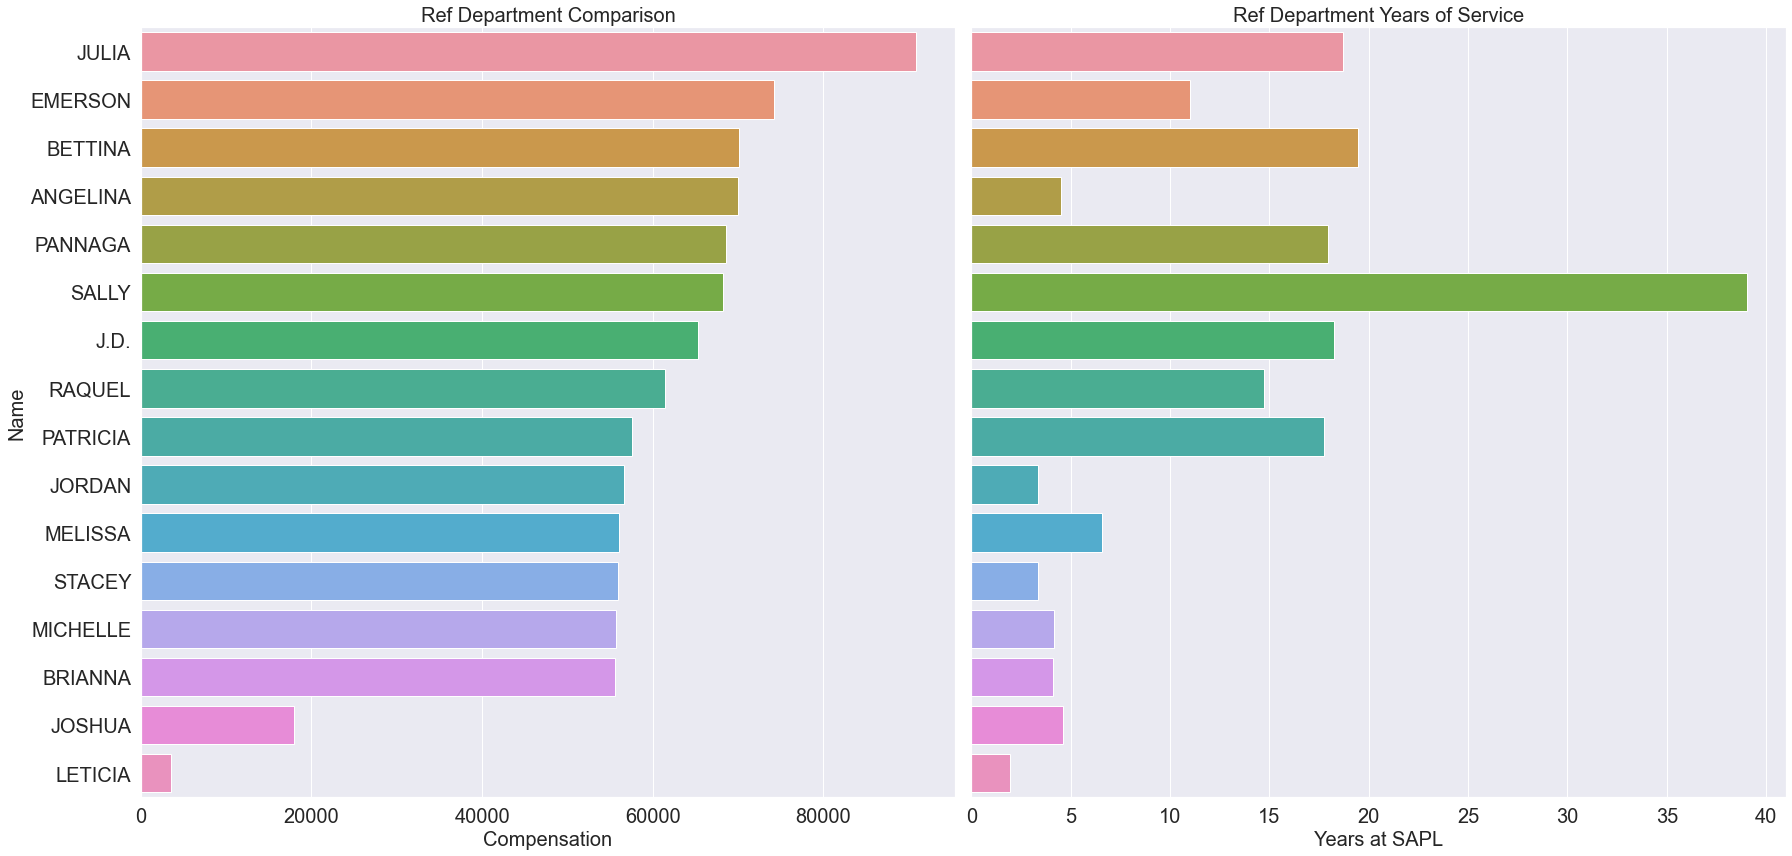

In [107]:
#let's plot these side by side

#set up figure
plt.figure(figsize=(25,12))

#-----------------------------------set up left chart -------------------------------------------------------------------
ax1 = plt.subplot(1,2,1)


#plot

sns.barplot(data=reference_dep,
            y='first_name',
            x='total_compensation',
           )

#set up labels and title
plt.xlabel('Compensation',fontsize=20)
plt.ylabel('Name',fontsize=20)
plt.title('Ref Department Comparison',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)



#-----------------------------------set up Right chart -------------------------------------------------------------------
ax2 = plt.subplot(1,2,2)

#plot
sns.barplot(data=reference_dep,
            y='first_name',
            x='years_service',
          )

#set up labels and title
plt.xlabel('Years at SAPL',fontsize=20)

#remove names from Right table bc they match up
plt.yticks([])
plt.xticks(fontsize=20)

#remove y label
plt.ylabel('')
plt.title('Ref Department Years of Service',fontsize=20)


#make look nice
plt.tight_layout()
plt.subplots_adjust(hspace = 0.5)

#show
plt.show()
if record:
    plt.savefig('9.3_l1YearsVsSal.png')

## Librarian Is


In [108]:
l1s = library_comp[library_comp['job_title']=='LIBRARIAN I']
l1s = pd.DataFrame(l1s).set_index('full_name')
l1smeans = l1s[['base_pay', 'leave_payout', 'other_pay', 'overtime', 'gross_earnings',
       'total_compensation', 'annual_salary', 'additional_benefits','years_service']].mean()

In [109]:
l1s.reset_index(inplace=True)

In [110]:
l1smeans

base_pay              41,709.21
leave_payout             823.57
other_pay                515.81
overtime                   0.43
gross_earnings        43,049.03
total_compensation    59,593.86
annual_salary         45,505.53
additional_benefits   16,544.83
years_service             11.70
dtype: float64

In [111]:
l1s.sort_values('dif_mean_comp',ascending=False,inplace=True)

In [115]:
#reset dif_mean_comp just with l1 data 

l1s['dif_mean_comp'] = l1s['total_compensation']-l1s['total_compensation'].mean()

#same for dif_mean_years

l1s['dif_from_years'] = l1s['years_service']-l1s['years_service'].mean()

### whats the average years of service for l1s?

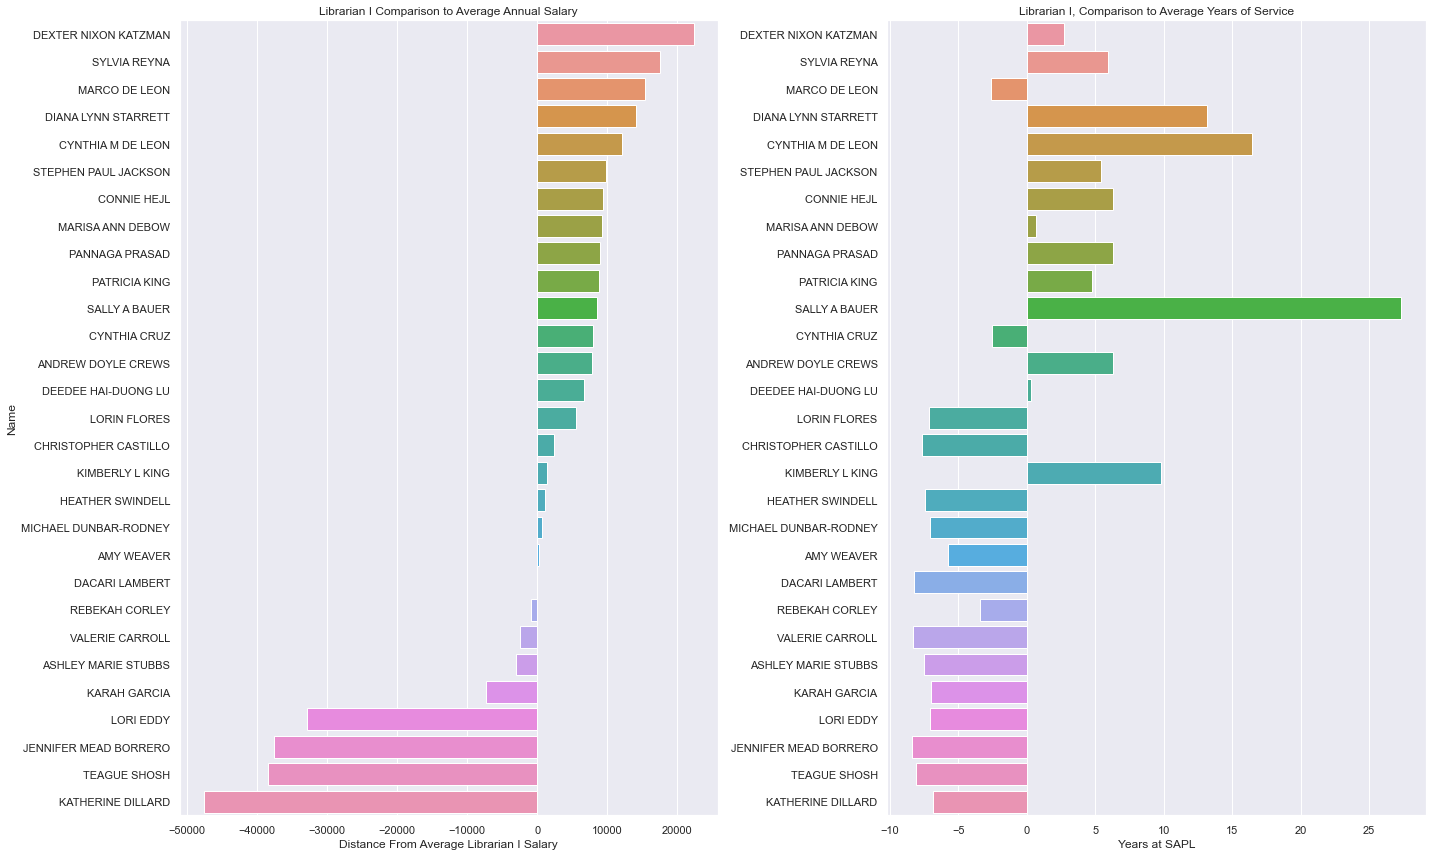

In [137]:
#let's plot the l1s avg

#set up figure
plt.figure(figsize=(20,12))

#-----------------------------------set up left, compensation chart -------------------------------------------------------------------
ax1 = plt.subplot(1,2,1)


#plot

sns.barplot(data=l1s,
            y=l1s['full_name'],
            x=l1s['dif_mean_comp'],
          #  hue='gender'
           )

#set up labels and title
plt.xlabel('Distance From Average Librarian I Salary')
plt.ylabel('Name')
plt.title('Librarian I Comparison to Average Annual Salary')


#-----------------------------------set up Right, years service chart -------------------------------------------------------------------
ax2 = plt.subplot(1,2,2)

#plot
sns.barplot(data=l1s,
            y=l1s['full_name'],
            x=l1s['dif_from_years'],
        #    hue='gender'
          )

#set up labels and title
plt.xlabel('Years at SAPL')

#remove names from Right table bc they match up
#plt.yticks([])

#remove y label
plt.ylabel('')
plt.title('Librarian I, Comparison to Average Years of Service')


#make look nice
plt.tight_layout()
plt.subplots_adjust(hspace = 0.5)

#show
plt.show()
if record:
    plt.savefig('9.3_l1YearsVsSal.png')

## Librarian IIs 

In [121]:
l2s = library_comp[library_comp['job_title']=='LIBRARIAN II']
l2s = pd.DataFrame(l2s).set_index('full_name')
l2s[['base_pay', 'leave_payout', 'other_pay', 'overtime', 'gross_earnings',
       'total_compensation', 'annual_salary', 'additional_benefits']].mean()

base_pay              49,713.16
leave_payout           1,224.27
other_pay                514.18
overtime                   0.00
gross_earnings        51,451.60
total_compensation    70,577.55
annual_salary         52,139.86
additional_benefits   19,125.95
dtype: float64

In [122]:
#reset dif_mean_comp just with l1 data 

l2s['dif_mean_comp'] = l2s['total_compensation']-l2s['total_compensation'].mean()

#same for dif_mean_years

l2s['dif_from_years'] = l2s['years_service']-l2s['years_service'].mean()

In [123]:
l2s.reset_index(inplace=True)

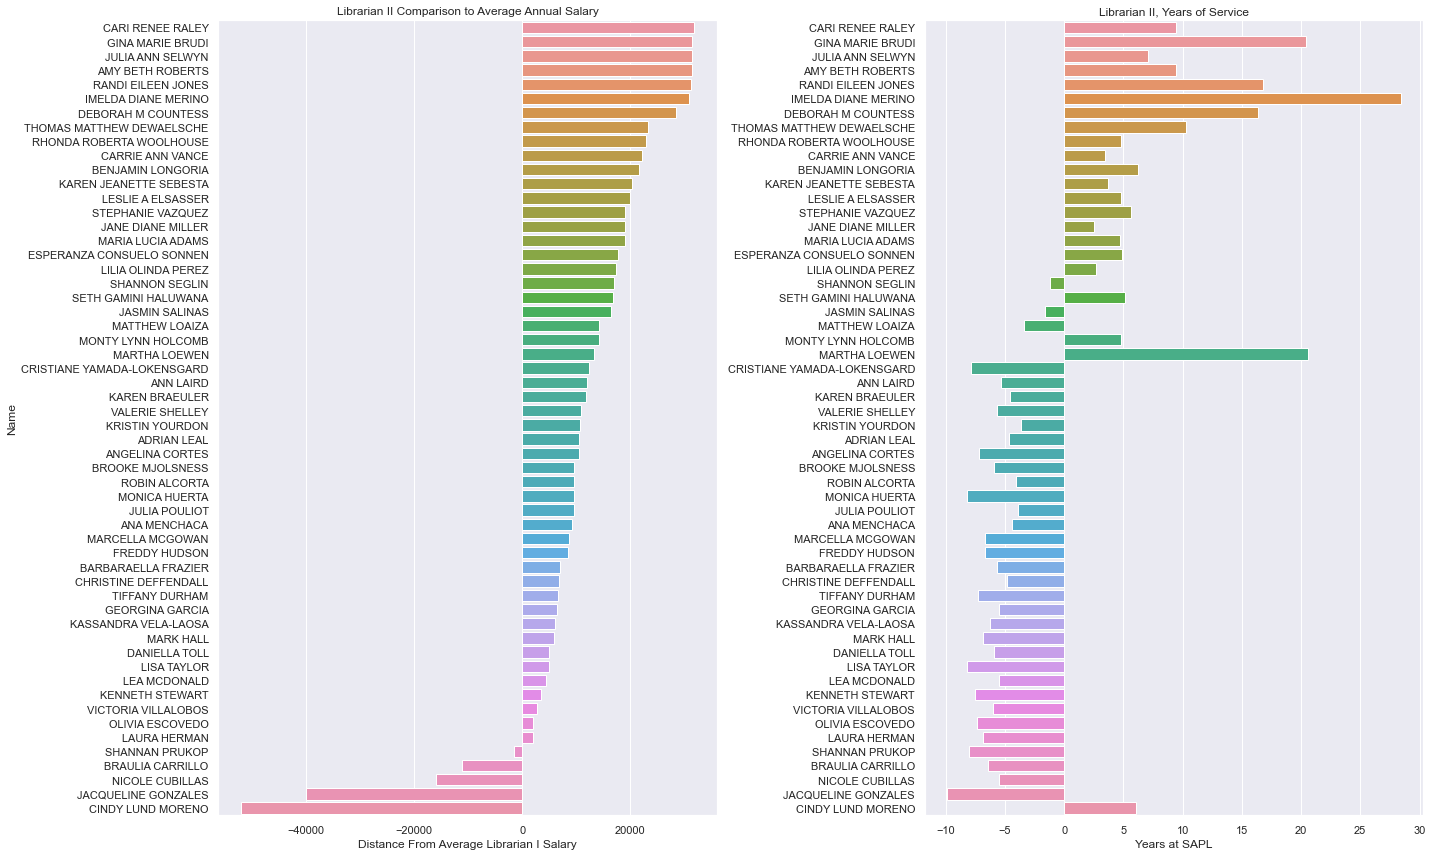

In [125]:
#let's plot the l2s avg

#set up figure
plt.figure(figsize=(20,12))

#-----------------------------------set up left, compensation chart -------------------------------------------------------------------
ax1 = plt.subplot(1,2,1)


#plot

sns.barplot(data=l2s,
            y=l2s['full_name'],
            x=l2s['dif_mean_comp'],
          #  hue='gender'
           )

#set up labels and title
plt.xlabel('Distance From Average Librarian II Salary')
plt.ylabel('Name')
plt.title('Librarian II Comparison to Average Annual Salary')


#-----------------------------------set up Right, years service chart -------------------------------------------------------------------
ax2 = plt.subplot(1,2,2)

#plot
sns.barplot(data=l2s,
            y=l2s['full_name'],
            x=l2s['dif_from_years'],
        #    hue='gender'
          )

#set up labels and title
plt.xlabel('Years at SAPL')

#remove names from Right table bc they match up
#plt.yticks([])

#remove y label
plt.ylabel('')
plt.title('Librarian II, Comparison to Average Years of Service')


#make look nice
plt.tight_layout()
plt.subplots_adjust(hspace = 0.5)

#show
plt.show()
if record:
    plt.savefig('9.3_l2YearsVsSal.png')

### What about l3s?

In [126]:
l3s = library_comp[library_comp['job_title']=='LIBRARIAN III']
l3s = pd.DataFrame(l3s).set_index('full_name')
l3s[['base_pay', 'leave_payout', 'other_pay', 'overtime', 'gross_earnings',
       'total_compensation', 'annual_salary', 'additional_benefits']].mean()

base_pay              57,855.16
leave_payout           1,938.25
other_pay                770.93
overtime                   0.00
gross_earnings        60,564.34
total_compensation    81,742.13
annual_salary         60,740.74
additional_benefits   21,177.80
dtype: float64

In [131]:
l3s.reset_index(inplace=True)

In [132]:
#reset dif_mean_comp just with l3 data 

l3s['dif_mean_comp'] = l3s['total_compensation']-l3s['total_compensation'].mean()

#same for dif_mean_years

l3s['dif_from_years'] = l3s['years_service']-l3s['years_service'].mean()

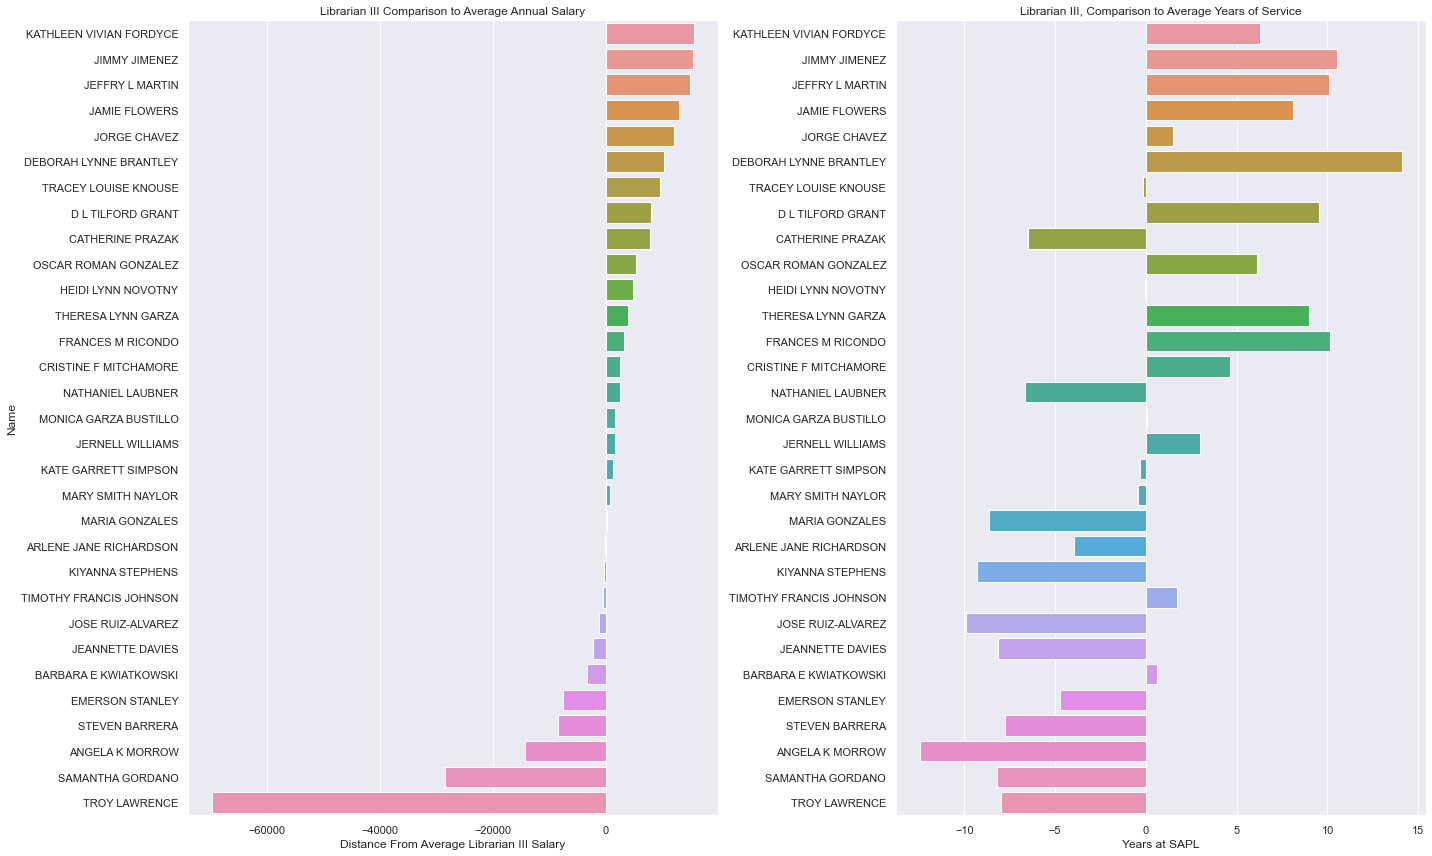

In [136]:
#let's plot the l3s avg

#set up figure
plt.figure(figsize=(20,12))

#-----------------------------------set up left, compensation chart -------------------------------------------------------------------
ax1 = plt.subplot(1,2,1)


#plot

sns.barplot(data=l3s,
            y=l3s['full_name'],
            x=l3s['dif_mean_comp'],
          #  hue='gender'
           )

#set up labels and title
plt.xlabel('Distance From Average Librarian III Salary')
plt.ylabel('Name')
plt.title('Librarian III Comparison to Average Annual Salary')


#-----------------------------------set up Right, years service chart -------------------------------------------------------------------
ax2 = plt.subplot(1,2,2)

#plot
sns.barplot(data=l3s,
            y=l3s['full_name'],
            x=l3s['dif_from_years'],
        #    hue='gender'
          )

#set up labels and title
plt.xlabel('Years at SAPL')

#remove names from Right table bc they match up
#plt.yticks([])

#remove y label
plt.ylabel('')
plt.title('Librarian III, Comparison to Average Years of Service')


#make look nice
plt.tight_layout()
plt.subplots_adjust(hspace = 0.5)

#show
plt.show()
if record:
    plt.savefig('9.3_l2YearsVsSal.png')

## librarians as a whole 

In [156]:
all_librarians = library_comp[(library_comp['job_title'] == 'LIBRARIAN I') |
             (library_comp['job_title'] == 'LIBRARIAN II') |
             (library_comp['job_title'] == 'LIBRARIAN III')]

In [157]:
#reset dif_mean_comp just with all librarian data 

all_librarians['dif_mean_comp'] = all_librarians['total_compensation']-all_librarians['total_compensation'].mean()

#same for dif_mean_years

all_librarians['dif_from_years'] = all_librarians['years_service']-all_librarians['years_service'].mean()

C:\Users\dansc\AppData\Local\Temp\ipykernel_23188\712074154.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_librarians['dif_mean_comp'] = all_librarians['total_compensation']-all_librarians['total_compensation'].mean()
C:\Users\dansc\AppData\Local\Temp\ipykernel_23188\712074154.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_librarians['dif_from_years'] = all_librarians['years_service']-all_librarians['years_service'].mean()


<AxesSubplot:xlabel='years_service', ylabel='total_compensation'>

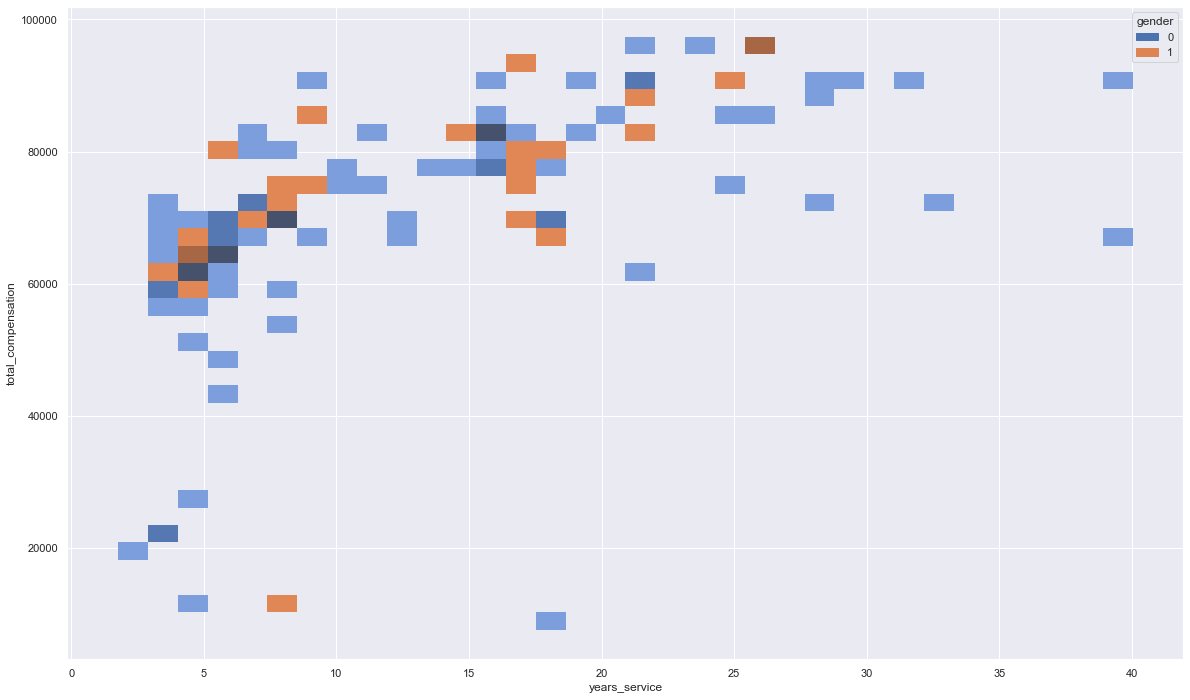

In [170]:
plt.figure(figsize=(20,12))

sns.histplot(data=all_librarians,
            x='years_service',
            y='total_compensation',
            hue='gender',
            bins=34
            )

In [167]:
all_librarians.columns

Index(['first_name', 'middle_name', 'last_name', 'employee_category',
       'hire_date', 'base_pay', 'leave_payout', 'other_pay', 'overtime',
       'gross_earnings', 'total_compensation', 'job_title', 'gender',
       'ethnic_orgin', 'employee_subgroup', 'withdraw_date', 'annual_salary',
       'additional_benefits', 'business_area', 'BA_tags', 'years_service',
       'full_name', 'withdraw_month', 'first_last', 'dif_mean_years',
       'dif_mean_comp', 'dif_from_years'],
      dtype='object')

<AxesSubplot:xlabel='years_service', ylabel='total_compensation'>

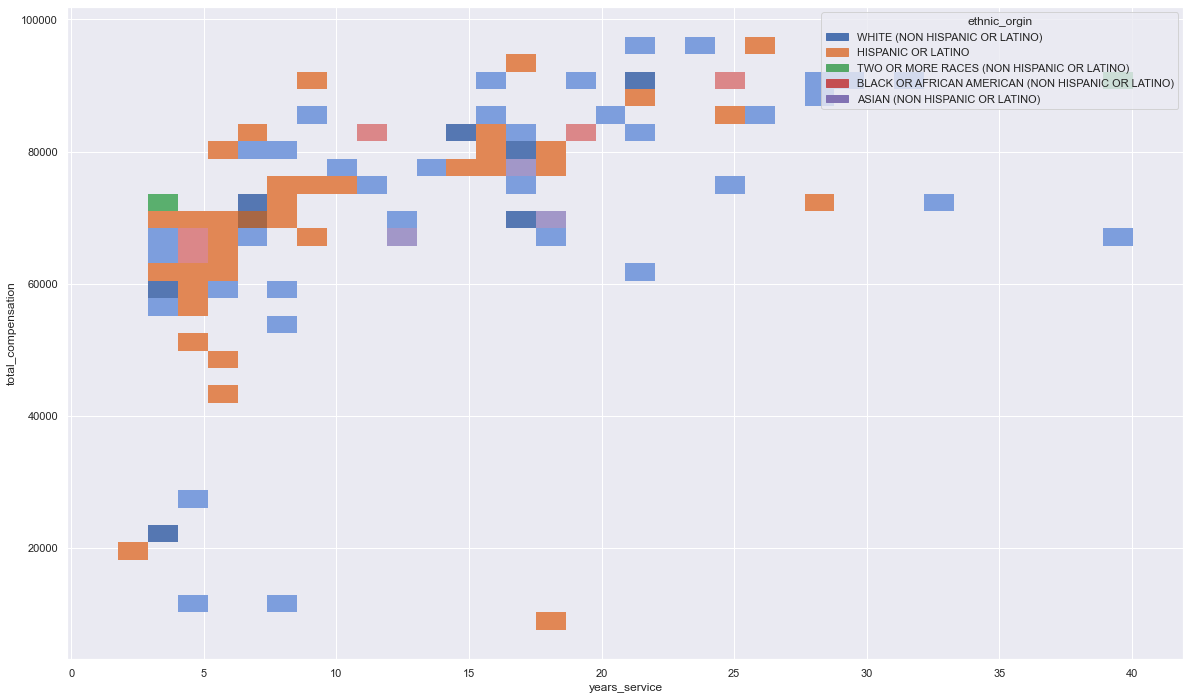

In [169]:
plt.figure(figsize=(20,12))


sns.histplot(data=all_librarians,
            x='years_service',
            y='total_compensation',
            hue='ethnic_orgin',
            bins=34
            )

## All library employees

## Is there any correlation between annual salary and gender?

In [ ]:
comp_styled = comp.style.background_gradient() #adding a gradient based on values in cell


In [ ]:
#first list make our xs as vs g
as_vs_g = comp.xs(['annual_salary','gender'],axis=1)

as_vs_g = as_vs_g.corr().style.background_gradient()

if record:
    dfi.export(as_vs_g,"10_as_vs_g.png")

In [ ]:
as_vs_g

In [ ]:
### Whats the same correlation specific to the library

In [ ]:
lib_as_vs_g = library_comp.xs(['annual_salary','gender'],axis=1)

lib_as_vs_g = lib_as_vs_g.corr().style.background_gradient()

if record:
    dfi.export(lib_as_vs_g,"11_lib_as_vs_g.png")

### Is there any correlation between years worked and total compensation?

In [ ]:
ys_vs_tc = comp[['total_compensation','years_service']].corr().style.background_gradient()

if record:
    dfi.export(ys_vs_tc,"12_ys_vs_tc.png")

In [ ]:
ys_vs_tc

### Is the correlation between years worked and total compensation differenct at the library?

In [ ]:
#yes it is a little weaker.
lib_ys_vs_tc = library_comp[['total_compensation','years_service']].corr().style.background_gradient()

if record:
    dfi.export(lib_ys_vs_tc,"13_lib_ys_vs_tc.png")

In [ ]:
lib_ys_vs_tc